<a href="https://colab.research.google.com/github/nirmalaqmc/binary-classifier/blob/main/2_VGG16_BINARY_CLASS_FOR_SEM_(nanowires_%26_patterned_surface_with_confusion_matrix)_Visualizing_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hello 

this program is about binary classifier using vgg16 for nanowires and patterned surface with confusion matrix for paper purpose

In [ ]:
#!pip install q keras==2.2.4

Paper https://www.nature.com/articles/sdata2018172

Dataset https://b2share.eudat.eu/records/80df8606fcdb4b2bae1656f0dc6db8ba



```
# This is a  Deep Learning based CNN Image classifer, transfer learning is used. Intial layers are set to trainable , then other layers

Goal is is to improve the accuracy. e 
Final output is a trained model file. it will be downloaded into the hardisk. 
```



In [ ]:
#delete the directory named mynewfiles including its subfolders with the rm -r command 
!rm -r mynewfiles
!rm -r tempzipfolder

In [169]:
!mkdir mynewfiles
!mkdir tempzipfolder

mkdir: cannot create directory ‘mynewfiles’: File exists
mkdir: cannot create directory ‘tempzipfolder’: File exists


#  **Step 1:**  Decide how many classes(n) and download the images into n folders 
a. Decide number of types of classify  (Do you want to segregate the images into 2 buckets ? Or do you want to segreagate into 5 buckets)  

```
# SET_NUMBER_OF_CLASSES = 2
```



b. Create folder1, folder2, folder3.... based on number of buckets 

```
# 
mkdir mynewfiles/folder3
mkdir mynewfiles/folder4

```



c. Download the ZIP files from the Dataset ( https://b2share.eudat.eu/records/80df8606fcdb4b2bae1656f0dc6db8ba), extract the files 

d. Based on the n folders, copy the respective files into n classes. Plan this step carefully . Example you can download 3 tar files such as Nanowires , Tips, Particles, Then move them into 2 folders. You want to find is it a nanowire or not a nanowire. So other images you put into folder2.  

```
# 
  mv tempzipfolder/Nanowires/*.*    mynewfiles/folder1

  mv tempzipfolder/Tips/*.*    mynewfiles/folder2  
  
  mv tempzipfolder/Particles/*.*    mynewfiles/folder2
```





In [171]:
!mkdir mynewfiles/folder1
!mkdir mynewfiles/folder2

In [170]:
# source URL for dataset: https://b2share.eudat.eu/records/72758204db9044ab8b3e6b6c4d2eb576

!wget https://b2share.eudat.eu/api/files/e3126ced-cb0b-4fde-a081-1aad550cae86/Nanowires.tar -O /tmp/dir2.tar

!wget https://b2share.eudat.eu/api/files/87275d32-0908-45bc-89e2-8f3d86029283/Patterned_surface.tar -O /tmp/dir1.tar

--2021-03-14 16:35:02--  https://b2share.eudat.eu/api/files/e3126ced-cb0b-4fde-a081-1aad550cae86/Nanowires.tar
Resolving b2share.eudat.eu (b2share.eudat.eu)... 86.50.166.74
Connecting to b2share.eudat.eu (b2share.eudat.eu)|86.50.166.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2203371520 (2.1G) [application/octet-stream]
Saving to: ‘/tmp/dir2.tar’

/tmp/dir2.tar       100%[===================>]   2.05G  10.1MB/s    in 3m 31s  

2021-03-14 16:38:35 (9.95 MB/s) - ‘/tmp/dir2.tar’ saved [2203371520/2203371520]

--2021-03-14 16:38:35--  https://b2share.eudat.eu/api/files/87275d32-0908-45bc-89e2-8f3d86029283/Patterned_surface.tar
Resolving b2share.eudat.eu (b2share.eudat.eu)... 86.50.166.74
Connecting to b2share.eudat.eu (b2share.eudat.eu)|86.50.166.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2875719680 (2.7G) [application/octet-stream]
Saving to: ‘/tmp/dir1.tar’

/tmp/dir1.tar       100%[===================>]   2.68G  9.85MB/s

In [8]:
!ls /tmp


dap_multiplexer.c09f596f6789.root.log.INFO.20210314-135035.48
dap_multiplexer.INFO
debugger_1eu0jtxoxw
dir1.tar
dir2.tar
initgoogle_syslog_dir.0
__pycache__
tmpqrkhwrpt.py


In [172]:
!ls mynewfiles

folder1  folder2


In [173]:
!tar xf  /tmp/dir1.tar  -C tempzipfolder

In [174]:
!tar xf  /tmp/dir2.tar -C tempzipfolder

In [175]:
!ls tempzipfolder/

Nanowires  Patterned_surface


In [13]:
SET_NUMBER_OF_CLASSES = 2

In [14]:
!ls

model.png  mynewfiles  sample_data  tempzipfolder


In [176]:
!mv tempzipfolder/Patterned_surface/*.*    mynewfiles/folder1

In [177]:
!mv tempzipfolder/Nanowires/*.*    mynewfiles/folder2

In [178]:
!ls mynewfiles

folder1  folder2


In [18]:
!pwd

/content


In [19]:
#!wget https://b2share.eudat.eu/api/files/e3126ced-cb0b-4fde-a081-1aad550cae86/Particles.tar -O /tmp/dir2.tar
  
#!wget https://b2share.eudat.eu/api/files/87275d32-0908-45bc-89e2-8f3d86029283/Patterned_surface.tar -O /tmp/dir2.tar

In [20]:
!ls /tmp


dap_multiplexer.c09f596f6789.root.log.INFO.20210314-135035.48
dap_multiplexer.INFO
debugger_1eu0jtxoxw
dir1.tar
dir2.tar
initgoogle_syslog_dir.0
__pycache__
tmpqrkhwrpt.py


In [21]:
!ls mynewfiles

folder1  folder2


In [22]:
# Delete a random set of files so that we can experiement fast. delete all files in this folder except keep 150 files
# Good idea to play with 100 files. Once we are confident, we can run the same experiment to 1000 files as it save waiting time for us
#!find mynewfiles/Biological -type f -print0 | sort -zR | tail -zn +150 | xargs -0 rm


In [23]:
#count no of files in a directory folder
#!ls mynewfiles/Biological   -1 | wc -l

In [24]:
#!wget https://b2share.eudat.eu/api/files/87275d32-0908-45bc-89e2-8f3d86029283/Tips.tar -O /tmp/dir3.tar

In [25]:
#!tar xvf  /tmp/dir3.tar -C mynewfiles

In [26]:
#!ls mynewfiles

#Goal: Just understand the high level concept 
###( let's understand the big picture , don't worry about the coding details right now..)

In [27]:
!ls mynewfiles

folder1  folder2


In [28]:
!pwd

/content


In [29]:
!ls

model.png  mynewfiles  sample_data  tempzipfolder


In [114]:
import os

ListofmyFolders = []


for i in range(SET_NUMBER_OF_CLASSES):
  ListofmyFolders.append( os.path.join('mynewfiles/folder' + str(i+1))  )
  print('total  images:', len(os.listdir(ListofmyFolders[i])))



total  images: 4755
total  images: 3815


total training images: 4755
mynewfiles/folder1/L1_7a61a4b0db786fac42f0c539901a85fa.jpg
(768, 1024, 3)


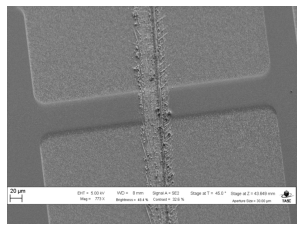

mynewfiles/folder1/L1_dc754b362373b6b2dd34411b73c6c269.jpg
(768, 1024, 3)


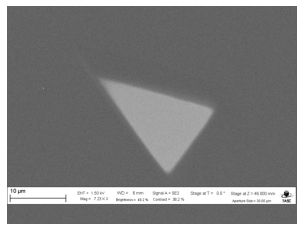

total training images: 3815
mynewfiles/folder2/L6_89a9f69839fdd1624a97ae5cafcf5160.jpg
(768, 1024, 3)


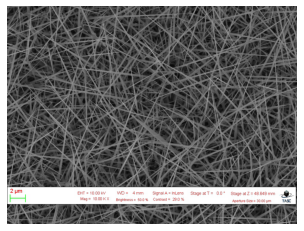

mynewfiles/folder2/L6_97440d083ff3f076d3b22a8e78aaa9c9.jpg
(768, 1024, 3)


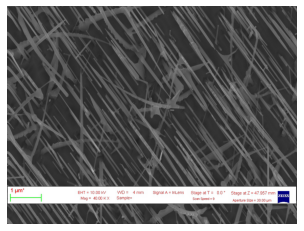

In [31]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 12

for i in range(SET_NUMBER_OF_CLASSES):
  print('total training images:', len(os.listdir(ListofmyFolders[i])))
  rock_files = os.listdir(ListofmyFolders[i])

  next_rock = [os.path.join(ListofmyFolders[i], fname) 
                for fname in rock_files[pic_index-2:pic_index]]
  for i, img_path in enumerate(next_rock):
    #print(img_path)
    img = mpimg.imread(img_path)
    print(img_path)
    print(img.shape)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()


#**Step 2** Trouble shoot if the system gives error message

If you see Out of Memory error, Change the SETBATCHSIZE to lower number such as 32 instead of 128

```
# SETBATCHSIZE = 128 
```



In [32]:
SIZE = 150

In [33]:
SETBATCHSIZE=128


In [34]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "mynewfiles/"

datagen = ImageDataGenerator(validation_split=0.1, rescale=1./255,      rotation_range=0,
     width_shift_range=0.2,
     height_shift_range=0.2,
     shear_range=0.2,
     zoom_range=0.2,
     horizontal_flip=True,                                                                
     fill_mode='nearest')

train_generator = datagen.flow_from_directory(
    TRAINING_DIR, 
    subset='training',
    target_size=(SIZE,SIZE),
         shuffle=True,     batch_size=SETBATCHSIZE,
	  class_mode='categorical'
)

validation_generator = datagen.flow_from_directory(
    TRAINING_DIR,
    subset='validation',
    	target_size=(SIZE,SIZE),
         shuffle=True,     batch_size=SETBATCHSIZE,
	class_mode='categorical'
)




test_datagen = ImageDataGenerator( rescale=1./255)


test_generator = test_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(SIZE,SIZE),
    batch_size=128,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

Found 7714 images belonging to 2 classes.
Found 856 images belonging to 2 classes.
Found 8570 images belonging to 2 classes.


In [35]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [36]:
from keras.applications import VGG16

pre_trained_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(SIZE, SIZE, 3))



In [37]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [38]:
#last_layer = pre_trained_model.get_layer('mixed7')

last_layer = pre_trained_model.get_layer('block5_conv1')
print(last_layer.output_shape)
last_output = last_layer.output

(None, 9, 9, 512)


In [39]:
ispostmixed = False 

for layer in pre_trained_model.layers:
  if layer.name == "block5_conv1":
    ispostmixed = True
  if ispostmixed == True:
    layer.trainable = True
    print(layer.name)

block5_conv1
block5_conv2
block5_conv3
block5_pool


In [40]:
from keras import layers





In [41]:
from keras import Model
#model = Model(pre_trained_model.input, x)





In [42]:
# Flatten the output layer to 1 dimension


last_layer = pre_trained_model.get_layer('block5_conv3')
print(last_layer.output_shape)
last_output = last_layer.output


x = layers.Conv2D( filters=100,  kernel_size=(3, 3), strides=(1, 1), activation="relu", name='test1') (last_output)
#x = layers.Conv2D( filters=30,  kernel_size=(3, 3), strides=(1, 1), activation="relu", name='test2') (x)
#x = layers.Conv2D( filters=10,  kernel_size=(3, 3), strides=(1, 1), activation="relu", name='test3') (x)


x = layers.Flatten()(x)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(4000, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
x = layers.BatchNormalization() (x)

x = layers.Dense(2, activation='softmax')(x)

(None, 9, 9, 512)


In [43]:
if False:
  last_layer = pre_trained_model.get_layer('block5_conv1')
  print(last_layer.output_shape)
  last_output = last_layer.output

  ispostmixed = False 

  for layer in pre_trained_model.layers:
    if layer.name == "block5_conv1":
      ispostmixed = True
    if ispostmixed == True:
      layer.trainable = True
      print(layer.name)

  from keras import layers

  # Flatten the output layer to 1 dimension
  x = layers.Flatten()(last_output)
  x = layers.BatchNormalization() (x)
  # Add a fully connected layer with 1,024 hidden units and ReLU activation
  x = layers.Dense(5000, activation='relu')(x)
  # Add a dropout rate of 0.2
  x = layers.Dropout(0.2)(x)
  x = layers.BatchNormalization() (x)
  x = layers.Dense(512, activation='relu')(x)
  x = layers.Dropout(0.2)(x)
  x = layers.BatchNormalization() (x)
  x = layers.Dense(2, activation='softmax')(x)

In [44]:
from keras import Model
model = Model(pre_trained_model.input, x)

In [45]:
model.summary()



Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [46]:
count = 1
for alayer in model.layers:
  print( str(count) + '    \t \t \t ' + str(alayer.name) + '    \t \t \t ' +  str(alayer.trainable) )
  count = count + 1 

1    	 	 	 input_1    	 	 	 False
2    	 	 	 block1_conv1    	 	 	 False
3    	 	 	 block1_conv2    	 	 	 False
4    	 	 	 block1_pool    	 	 	 False
5    	 	 	 block2_conv1    	 	 	 False
6    	 	 	 block2_conv2    	 	 	 False
7    	 	 	 block2_pool    	 	 	 False
8    	 	 	 block3_conv1    	 	 	 False
9    	 	 	 block3_conv2    	 	 	 False
10    	 	 	 block3_conv3    	 	 	 False
11    	 	 	 block3_pool    	 	 	 False
12    	 	 	 block4_conv1    	 	 	 False
13    	 	 	 block4_conv2    	 	 	 False
14    	 	 	 block4_conv3    	 	 	 False
15    	 	 	 block4_pool    	 	 	 False
16    	 	 	 block5_conv1    	 	 	 True
17    	 	 	 block5_conv2    	 	 	 True
18    	 	 	 block5_conv3    	 	 	 True
19    	 	 	 test1    	 	 	 True
20    	 	 	 flatten    	 	 	 True
21    	 	 	 dense    	 	 	 True
22    	 	 	 dropout    	 	 	 True
23    	 	 	 batch_normalization    	 	 	 True
24    	 	 	 dense_1    	 	 	 True


In [47]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size

print('No of training images   = ' + str(train_generator.n))
print('No of validation images = ' + str(validation_generator.n))
print('No of folders           = ' + str(train_generator.num_classes))

No of training images   = 7714
No of validation images = 856
No of folders           = 2


In [48]:
#train_generator.num_classes

In [49]:
if STEP_SIZE_VALID == 0:
  STEP_SIZE_VALID = 1

In [50]:
#STEPSPEREPOCH = 7600 // 128
#STEPSPEREPOCH

In [51]:
# Flatten the output layer to 1 dimension


last_layer = pre_trained_model.get_layer('block5_conv3')
print(last_layer.output_shape)
last_output = last_layer.output


x = layers.Conv2D( filters=100,  kernel_size=(3, 3), strides=(1, 1), activation="relu", name='test1') (last_output)
x = layers.Conv2D( filters=30,  kernel_size=(3, 3), strides=(1, 1), activation="relu", name='test2') (x)
x = layers.Conv2D( filters=10,  kernel_size=(3, 3), strides=(1, 1), activation="relu", name='test3') (x)


x = layers.Flatten()(x)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(128, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
x = layers.BatchNormalization() (x)

x = layers.Dense(2, activation='softmax')(x)

model = Model(pre_trained_model.input, x)

(None, 9, 9, 512)


In [52]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

In [53]:
count = 1
for alayer in model.layers:
  print( str(count) + '    \t \t \t ' + str(alayer.name) + '    \t \t \t ' +  str(alayer.trainable) )
  count = count + 1 

1    	 	 	 input_1    	 	 	 False
2    	 	 	 block1_conv1    	 	 	 False
3    	 	 	 block1_conv2    	 	 	 False
4    	 	 	 block1_pool    	 	 	 False
5    	 	 	 block2_conv1    	 	 	 False
6    	 	 	 block2_conv2    	 	 	 False
7    	 	 	 block2_pool    	 	 	 False
8    	 	 	 block3_conv1    	 	 	 False
9    	 	 	 block3_conv2    	 	 	 False
10    	 	 	 block3_conv3    	 	 	 False
11    	 	 	 block3_pool    	 	 	 False
12    	 	 	 block4_conv1    	 	 	 False
13    	 	 	 block4_conv2    	 	 	 False
14    	 	 	 block4_conv3    	 	 	 False
15    	 	 	 block4_pool    	 	 	 False
16    	 	 	 block5_conv1    	 	 	 True
17    	 	 	 block5_conv2    	 	 	 True
18    	 	 	 block5_conv3    	 	 	 True
19    	 	 	 test1    	 	 	 True
20    	 	 	 test2    	 	 	 True
21    	 	 	 test3    	 	 	 True
22    	 	 	 flatten_1    	 	 	 True
23    	 	 	 dense_2    	 	 	 True
24    	 	 	 dropout_1    	 	 	 True
25    	 	 	 batch_normalization_1    	 	 	 True
26    	 	 	 dense_3    	 	 	 True


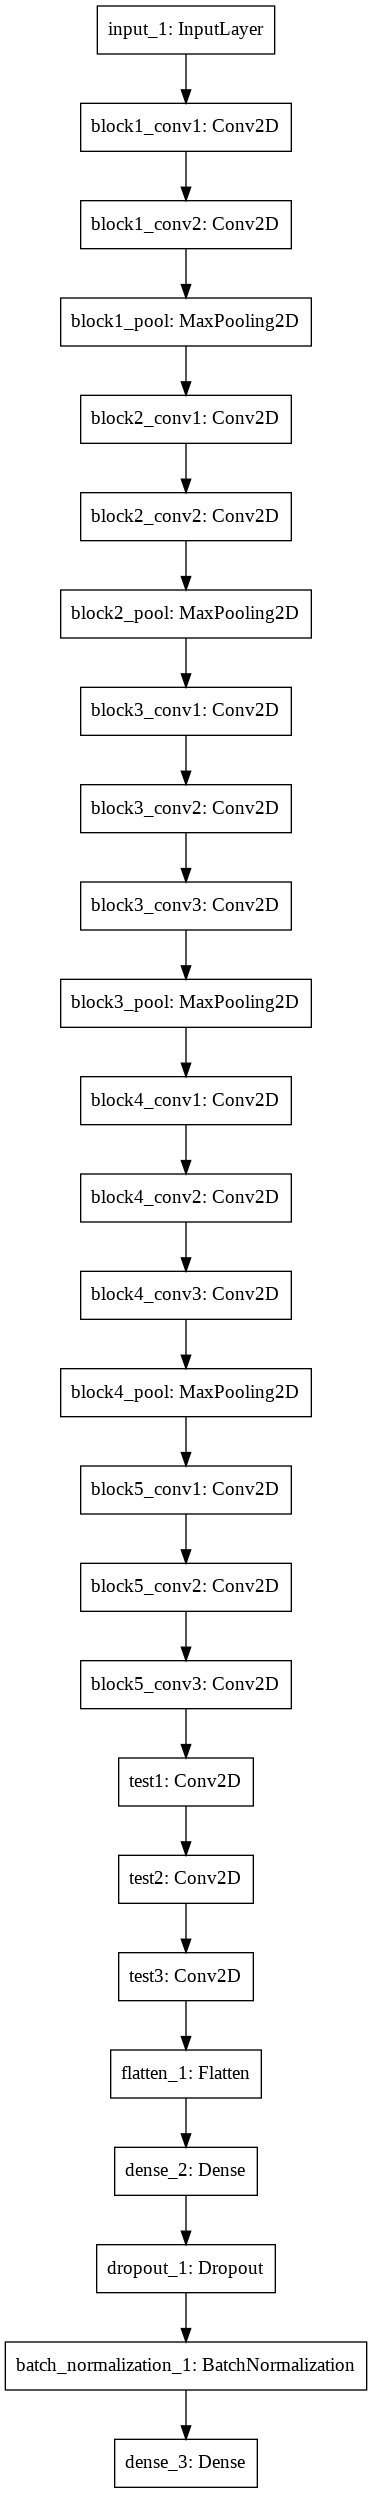

In [54]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [55]:
earlystopcallingback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=1)

In [56]:
bestmodelcheckpoint = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)


In [57]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit_generator(train_generator, epochs=4, validation_data = validation_generator , verbose = 1, steps_per_epoch=STEP_SIZE_TRAIN, validation_steps=STEP_SIZE_VALID,
                              callbacks=[earlystopcallingback, bestmodelcheckpoint]
                              )

#model.save("rps.h5")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/4
60/60 [==============================] - 279s 4s/step - loss: 0.5123 - accuracy: 0.7355 - val_loss: 0.3330 - val_accuracy: 0.9310
Epoch 2/4
60/60 [==============================] - 204s 3s/step - loss: 0.1850 - accuracy: 0.9235 - val_loss: 0.5506 - val_accuracy: 0.8841
Epoch 00002: early stopping


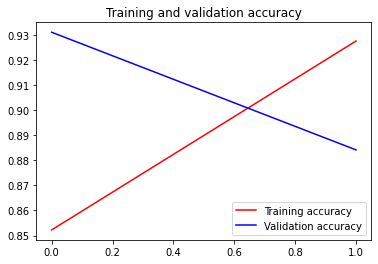

<Figure size 432x288 with 0 Axes>

In [58]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [59]:
for layer in model.layers:
  layer.trainable = True

In [60]:
count = 1
for alayer in model.layers:
  print( str(count) + '    \t \t \t ' + str(alayer.name) + '    \t \t \t ' +  str(alayer.trainable) )
  count = count + 1 

1    	 	 	 input_1    	 	 	 True
2    	 	 	 block1_conv1    	 	 	 True
3    	 	 	 block1_conv2    	 	 	 True
4    	 	 	 block1_pool    	 	 	 True
5    	 	 	 block2_conv1    	 	 	 True
6    	 	 	 block2_conv2    	 	 	 True
7    	 	 	 block2_pool    	 	 	 True
8    	 	 	 block3_conv1    	 	 	 True
9    	 	 	 block3_conv2    	 	 	 True
10    	 	 	 block3_conv3    	 	 	 True
11    	 	 	 block3_pool    	 	 	 True
12    	 	 	 block4_conv1    	 	 	 True
13    	 	 	 block4_conv2    	 	 	 True
14    	 	 	 block4_conv3    	 	 	 True
15    	 	 	 block4_pool    	 	 	 True
16    	 	 	 block5_conv1    	 	 	 True
17    	 	 	 block5_conv2    	 	 	 True
18    	 	 	 block5_conv3    	 	 	 True
19    	 	 	 test1    	 	 	 True
20    	 	 	 test2    	 	 	 True
21    	 	 	 test3    	 	 	 True
22    	 	 	 flatten_1    	 	 	 True
23    	 	 	 dense_2    	 	 	 True
24    	 	 	 dropout_1    	 	 	 True
25    	 	 	 batch_normalization_1    	 	 	 True
26    	 	 	 dense_3    	 	 	 True


In [61]:
earlystopcallingback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=1)

bestmodelcheckpoint = ModelCheckpoint('best_model_final.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [62]:
#model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history1 = model.fit_generator(train_generator, epochs=3, validation_data = validation_generator , verbose = 1, steps_per_epoch=STEP_SIZE_TRAIN, validation_steps=STEP_SIZE_VALID,
                              callbacks=[earlystopcallingback, bestmodelcheckpoint]
                              )

#model.save("rps.h5")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
60/60 [==============================] - 201s 3s/step - loss: 0.1458 - accuracy: 0.9429 - val_loss: 0.5033 - val_accuracy: 0.8815
Epoch 2/3
60/60 [==============================] - 196s 3s/step - loss: 0.1365 - accuracy: 0.9486 - val_loss: 0.3611 - val_accuracy: 0.8945
Epoch 3/3
60/60 [==============================] - 198s 3s/step - loss: 0.1191 - accuracy: 0.9553 - val_loss: 0.1014 - val_accuracy: 0.9661


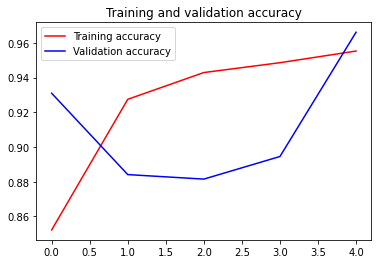

<Figure size 432x288 with 0 Axes>

In [63]:
import matplotlib.pyplot as plt
acc1 = history1.history['accuracy']
val_acc1 = history1.history['val_accuracy']
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

accTotal = acc + acc1
val_accTotal = val_acc + val_acc1

epochs = range(len(acc))

plt.plot( accTotal, 'r', label='Training accuracy')
plt.plot( val_accTotal, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [64]:
import math


print(  'epoch   Val Accuacy           ,      Train Accuracy'  )
for i in range(len( val_accTotal )):
  print( str(i) + '  ,      ' + str( round( 100* float( val_accTotal[i] ) , 2 ))  +    '              ,         ' + str( round( 100* float( accTotal[i] ) , 2 )) )

epoch   Val Accuacy           ,      Train Accuracy
0  ,      93.1              ,         85.22
1  ,      88.41              ,         92.75
2  ,      88.15              ,         94.29
3  ,      89.45              ,         94.86
4  ,      96.61              ,         95.53


#**Step 3:** Best trained neural network model is saved here.  Note it will large file, so upload it to Google Drive by mounting it..  

In [65]:
!ls

model.png  mynewfiles  sample_data  tempzipfolder


In [66]:
from google.colab import files


In [67]:
#files.download("best_model_final.h5")


In [68]:
#from google.colab import drive 
#drive.mount('/nanoaid')

# New Section

 **Final step**  
 1. Give a good name to the file 
 2. Save to file by un-commenting
 

In [69]:
#!cp best_model_final.h5 "/content/drive/My Drive/best_model_final12DecNiRMALAFile21.h5"

In [70]:
!ls -l * 

-rw-r--r-- 1 root root 76831 Mar 14 14:39 model.png

mynewfiles:
total 576
drwxr-xr-x 2 root root 327680 Mar 14 14:39 folder1
drwxr-xr-x 2 root root 258048 Mar 14 14:39 folder2

sample_data:
total 55504
-rwxr-xr-x 1 root root     1697 Jan  1  2000 anscombe.json
-rw-r--r-- 1 root root   301141 Mar  5 14:37 california_housing_test.csv
-rw-r--r-- 1 root root  1706430 Mar  5 14:37 california_housing_train.csv
-rw-r--r-- 1 root root 18289443 Mar  5 14:37 mnist_test.csv
-rw-r--r-- 1 root root 36523880 Mar  5 14:37 mnist_train_small.csv
-rwxr-xr-x 1 root root      930 Jan  1  2000 README.md

tempzipfolder:
total 568
drwxrwxr-x 2 2009 999 262144 Mar 14 14:39 Nanowires
drwxrwxr-x 2 2009 999 319488 Mar 14 14:39 Patterned_surface


In [71]:

#files.download("vggMEMSwires2.h5")


In [72]:
!ls

model.png  mynewfiles  sample_data  tempzipfolder


In [73]:
#files.download("vggMEMSwires.h5")

In [74]:
#history = model.fit_generator(train_generator, epochs=4, validation_data = validation_generator , verbose = 1)


In [75]:
test_generator.reset()


In [76]:
#STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size

import numpy as np

predictions =model.predict_generator(test_generator, steps=10, verbose=1)
print(predictions)

predicted_class_indices=np.argmax(predictions,axis=1)
print(predicted_class_indices)

labels = (test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictionsanswers = [labels[k] for k in predicted_class_indices]



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


10/10 [==============================] - 24s 2s/step
[[9.9983990e-01 1.6011683e-04]
 [1.0000000e+00 3.2949565e-10]
 [9.9998271e-01 1.7273362e-05]
 ...
 [1.1186687e-06 9.9999893e-01]
 [9.9986732e-01 1.3270327e-04]
 [9.9847561e-01 1.5243414e-03]]
[0 0 0 ... 1 0 0]


In [77]:
predictions = model.predict_generator( train_generator , 6)



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [78]:
print(predictions)



[[9.9998724e-01 1.2790060e-05]
 [9.8025674e-01 1.9743247e-02]
 [9.9981672e-01 1.8334192e-04]
 ...
 [1.7396392e-09 1.0000000e+00]
 [9.6334666e-01 3.6653291e-02]
 [9.9940288e-01 5.9714017e-04]]


In [79]:
predicted_class_indices=np.argmax(predictions,axis=-1)
print(predicted_class_indices)


[0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0
 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1
 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 1
 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1 1
 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0
 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0
 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0
 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0
 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1
 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0
 0 1 0 0 1 0 0 0 0 1 1 1 

In [80]:
filenames=test_generator.filenames

print(filenames)

['folder1/L1_0009994b978735c76dba161531a98aed.jpg', 'folder1/L1_000d090392623f8046ebe84a1b345bf7.jpg', 'folder1/L1_000f9e2e89ff8ffa8e3b9a6ac12bf490.jpg', 'folder1/L1_00121c0a74892cd1f912fd12431b8491.jpg', 'folder1/L1_00134bc9f89efb9f09bdb45a4093c091.jpg', 'folder1/L1_00258fcc3b10a635d35c814c1a4f0e07.jpg', 'folder1/L1_0038174cefc3df4be1ad04962ee2809d.jpg', 'folder1/L1_0044a9a84b2b487a6eaa2f694a4f2153.jpg', 'folder1/L1_004df5a0c62d4850720c00a5d2afb40a.jpg', 'folder1/L1_008e7acbd8b621d496211b723572de5c.jpg', 'folder1/L1_009c7128293e93679c8f466a9cf9e4cc.jpg', 'folder1/L1_00b7cd25b46675ac4c5bf057470acd6f.jpg', 'folder1/L1_00bc6da902103e29b555ba4c87e193b6.jpg', 'folder1/L1_00cf9710bc59c929399817ae20b7fec6.jpg', 'folder1/L1_00d20402369a67e1a663c812f6f6730b.jpg', 'folder1/L1_00df16de32a420819579f76f1e4c8f73.jpg', 'folder1/L1_00e52e8047b047cc5a50756a5f329412.jpg', 'folder1/L1_00f4aa2aff02c444df77448b60942d63.jpg', 'folder1/L1_00fa35a6f61da36f1c9b79cefd23baea.jpg', 'folder1/L1_00fc0a86bd4f02995a

In [81]:
len(filenames)

8570

In [82]:
for i in range( 3):
 print(predictionsanswers[i] , filenames[i] ) 



folder1 folder1/L1_0009994b978735c76dba161531a98aed.jpg
folder1 folder1/L1_000d090392623f8046ebe84a1b345bf7.jpg
folder1 folder1/L1_000f9e2e89ff8ffa8e3b9a6ac12bf490.jpg




```
# This is formatted as code
```

#Step 4: Visvalize

Just change the slider below and then Run After this cell (Control + F10)

In [236]:
pic_index = 230 #@param {type:"slider", min:2, max:400, step:1}


total training images: 4755
mynewfiles/folder1/L1_36bbe23c457e5374bfdcf74029768844.jpg
(768, 1024, 3)


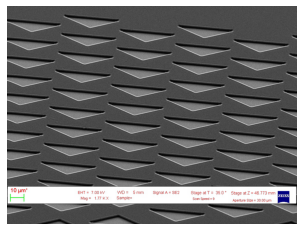

mynewfiles/folder1/L1_683ea1367a08b64dddf6e317805f5883.jpg
(768, 1024, 3)


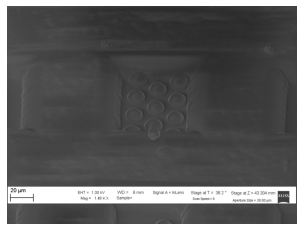

total training images: 3815
mynewfiles/folder2/L6_17ef9e42ba0517b87143cae96935ffc3.jpg
(768, 1024, 3)


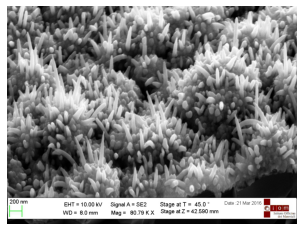

mynewfiles/folder2/L6_88d1c6cd5db6088c926806020de39528.jpg
(768, 1024, 3)


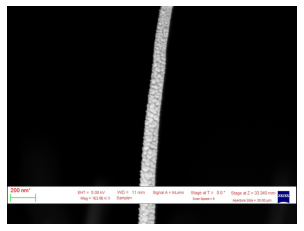

In [237]:
#pic_index = 100

for i in range(SET_NUMBER_OF_CLASSES):
  print('total training images:', len(os.listdir(ListofmyFolders[i])))
  rock_files = os.listdir(ListofmyFolders[i])

  next_rock = [os.path.join(ListofmyFolders[i], fname) 
                for fname in rock_files[pic_index-2:pic_index]]
  for i, img_path in enumerate(next_rock):
    #print(img_path)
    img = mpimg.imread(img_path)
    print(img_path)
    print(img.shape)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

In [186]:
# We preprocess the image into a 4D tensor
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

(1, 150, 150, 3)


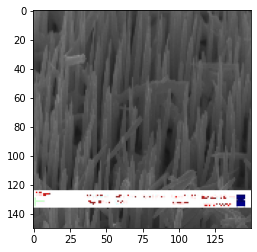

In [187]:
plt.imshow(img)

In [189]:
myinputlayer = 0
for alayer in model.layers:
  if alayer.name=='input_1':
    print(str(alayer.name) + '    \t \t \t ' +  str(alayer.trainable))
    myinputlayer = alayer

print(myinputlayer)

input_1    	 	 	 True


In [88]:
#model.save('x.h5')


In [89]:
import keras



In [90]:
from keras.models import load_model


In [91]:
#model = load_model('x.h5')

In [190]:
from keras import models

#from tensorflow.compat.v1.keras.models import Model

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers]
# Creates a model that will return these outputs, given the model input:
#activation_model = models.Model(inputs=pre_trained_model.input, outputs=layer_outputs)

print( layer_outputs)

print( layer_outputs[0])
print( layer_outputs[18])




[<KerasTensor: shape=(None, 150, 150, 3) dtype=float32 (created by layer 'input_1')>, <KerasTensor: shape=(None, 150, 150, 64) dtype=float32 (created by layer 'block1_conv1')>, <KerasTensor: shape=(None, 150, 150, 64) dtype=float32 (created by layer 'block1_conv2')>, <KerasTensor: shape=(None, 75, 75, 64) dtype=float32 (created by layer 'block1_pool')>, <KerasTensor: shape=(None, 75, 75, 128) dtype=float32 (created by layer 'block2_conv1')>, <KerasTensor: shape=(None, 75, 75, 128) dtype=float32 (created by layer 'block2_conv2')>, <KerasTensor: shape=(None, 37, 37, 128) dtype=float32 (created by layer 'block2_pool')>, <KerasTensor: shape=(None, 37, 37, 256) dtype=float32 (created by layer 'block3_conv1')>, <KerasTensor: shape=(None, 37, 37, 256) dtype=float32 (created by layer 'block3_conv2')>, <KerasTensor: shape=(None, 37, 37, 256) dtype=float32 (created by layer 'block3_conv3')>, <KerasTensor: shape=(None, 18, 18, 256) dtype=float32 (created by layer 'block3_pool')>, <KerasTensor: sh

In [191]:
activation_model = models.Model(inputs=layer_outputs[0], outputs=layer_outputs[1])

In [192]:
activations = activation_model.predict(img_tensor)


In [193]:
activations.shape

(1, 150, 150, 64)

In [194]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(150, 150, 64)


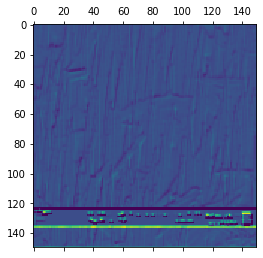

In [195]:
import matplotlib.pyplot as plt

plt.matshow(activations[0, :, :, 3], cmap='viridis')
plt.show()

In [196]:
activation_model = models.Model(inputs=layer_outputs[0], outputs=layer_outputs[4])

In [197]:
activations = activation_model.predict(img_tensor)


In [198]:
activations.shape

(1, 75, 75, 128)

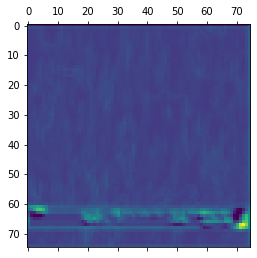

In [199]:
plt.matshow(activations[0, :, :, 3], aspect='auto', cmap='viridis')
plt.show()

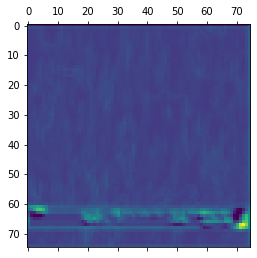

In [200]:
plt.matshow(activations[0, :, :, 3], aspect='auto', cmap='viridis')
plt.show()

In [103]:
activation_model = models.Model(inputs=layer_outputs[0], outputs=layer_outputs[4])

In [104]:
activation_model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
Total params: 112,576
Trainable params: 112,576
Non-trainable params: 0
_________________________________________________________________


In [105]:
activations = activation_model.predict(img_tensor)


In [106]:
layer_activation = activations[0]

layer_activation.shape

(75, 75, 128)

In [107]:
activations.shape

(1, 75, 75, 128)

128
16
(1200, 600)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


<Figure size 576x1152 with 0 Axes>

<Figure size 576x1152 with 0 Axes>

<Figure size 576x1152 with 0 Axes>

<Figure size 576x1152 with 0 Axes>

<Figure size 576x1152 with 0 Axes>

<Figure size 576x1152 with 0 Axes>

<Figure size 576x1152 with 0 Axes>

<Figure size 576x1152 with 0 Axes>

<Figure size 576x1152 with 0 Axes>

<Figure size 576x1152 with 0 Axes>

<Figure size 576x1152 with 0 Axes>

<Figure size 576x1152 with 0 Axes>

<Figure size 576x1152 with 0 Axes>

<Figure size 576x1152 with 0 Axes>

<Figure size 576x1152 with 0 Axes>

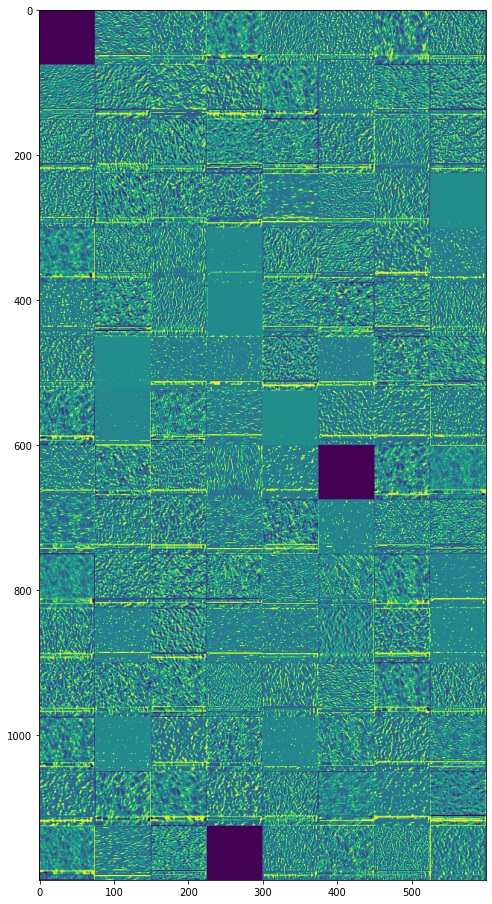

In [108]:
images_per_row = 8
n_features = layer_activation.shape[-1]
size = layer_activation.shape[1]


print(n_features)

n_cols = n_features // images_per_row
display_grid = np.zeros((size * n_cols, images_per_row * size))

print(n_cols)
print(display_grid.shape)

# We'll tile each filter into this big horizontal grid
if True:
  for col in range(n_cols):
    for row in range(images_per_row):
              channel_image = layer_activation[
                                               :, :,
                                               col * images_per_row + row]
              # Post-process the feature to make it visually palatable
              channel_image -= channel_image.mean()
              channel_image /= channel_image.std()
              channel_image *= 64
              channel_image += 128
              channel_image = np.clip(channel_image, 0, 255).astype('uint8')
             # print(channel_image.shape)
             # print(col * size)
             # print((col + 1) * size)
              display_grid[col * size : (col + 1) * size,
                           row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                          scale * display_grid.shape[0]))
  plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

In [109]:
#plt.imshow(img_tensor)

In [110]:
from keras.applications import VGG16
from keras import backend as K

#model = VGG16(weights='imagenet',              include_top=False)

layer_name = 'block5_conv3'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

In [111]:
layer_output

<KerasTensor: shape=(None, 9, 9, 512) dtype=float32 (created by layer 'block5_conv3')>

In [ ]:
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [ ]:
def generate_pattern(layer_name, filter_index, size=150):
    # Build a loss function that maximizes the activation
    # of the nth filter of the layer considered.
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])

    # Compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, model.input)[0]

    # Normalization trick: we normalize the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

    # This function returns the loss and grads given the input picture
    iterate = K.function([model.input], [loss, grads])
    
    # We start from a gray image with some noise
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.

    # Run gradient ascent for 40 steps
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

# Step 5: Final Predictions

In [113]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        TRAINING_DIR,
        target_size=(150, 150),
        color_mode="rgb",
        shuffle = False,
        class_mode='categorical',
        batch_size=1)

filenames = test_generator.filenames
nb_samples = len(filenames)

predict = model.predict_generator(test_generator,steps = nb_samples)

Found 8570 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [115]:
predict = model.predict_generator(test_generator,steps = nb_samples)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [116]:
print(nb_samples)
print(predict)
print(filenames)

8570
[[9.9999321e-01 6.7370365e-06]
 [1.0000000e+00 2.2381890e-09]
 [9.9999976e-01 2.8588212e-07]
 ...
 [9.9439740e-02 9.0056026e-01]
 [7.6063693e-01 2.3936307e-01]
 [3.2728113e-02 9.6727186e-01]]
['folder1/L1_0009994b978735c76dba161531a98aed.jpg', 'folder1/L1_000d090392623f8046ebe84a1b345bf7.jpg', 'folder1/L1_000f9e2e89ff8ffa8e3b9a6ac12bf490.jpg', 'folder1/L1_00121c0a74892cd1f912fd12431b8491.jpg', 'folder1/L1_00134bc9f89efb9f09bdb45a4093c091.jpg', 'folder1/L1_00258fcc3b10a635d35c814c1a4f0e07.jpg', 'folder1/L1_0038174cefc3df4be1ad04962ee2809d.jpg', 'folder1/L1_0044a9a84b2b487a6eaa2f694a4f2153.jpg', 'folder1/L1_004df5a0c62d4850720c00a5d2afb40a.jpg', 'folder1/L1_008e7acbd8b621d496211b723572de5c.jpg', 'folder1/L1_009c7128293e93679c8f466a9cf9e4cc.jpg', 'folder1/L1_00b7cd25b46675ac4c5bf057470acd6f.jpg', 'folder1/L1_00bc6da902103e29b555ba4c87e193b6.jpg', 'folder1/L1_00cf9710bc59c929399817ae20b7fec6.jpg', 'folder1/L1_00d20402369a67e1a663c812f6f6730b.jpg', 'folder1/L1_00df16de32a420819579f76f1

In [117]:
predicted_class_indices=np.argmax(predict,axis=1)
print(predicted_class_indices)

labels = (test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictionsanswers = [labels[k] for k in predicted_class_indices]
print(predictionsanswers)


[0 0 0 ... 1 0 1]
['folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder2', 'folder1', 'folder1', 'folder1', 'folder1', 'folder2', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'folder2', 'folder1', 'folder1', 'folder1', 'folder1', 'folder1', 'f

In [121]:
generator = datagen.flow_from_directory(
        TRAINING_DIR,
        target_size=(150, 150),
        batch_size=16,
        class_mode=None,  # only data, no labels
        shuffle=False)  # keep data in same order as labels

probabilities = model.predict_generator(generator, 2000)

Found 8570 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [127]:
from sklearn.metrics import confusion_matrix

y_true = np.array([0] * 4755 + [1] * 3815)
y_pred = predict > 0.5



In [132]:
predicted_class_indices=np.argmax(predict,axis=-1)
predicted_class_indices


array([0, 0, 0, ..., 1, 0, 1])

In [128]:
y_true

array([0, 0, 0, ..., 1, 1, 1])

In [136]:
cf_matrix = confusion_matrix(y_true, predicted_class_indices)
cf_matrix

array([[4678,   77],
       [ 153, 3662]])

https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

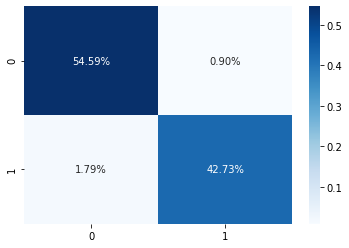

In [138]:
import seaborn as sns
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

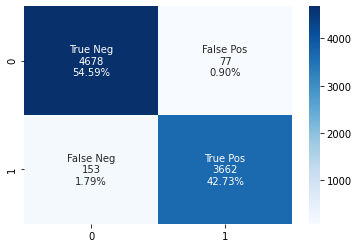

In [143]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [144]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

array([[4678,   77],
       [ 153, 3662]])

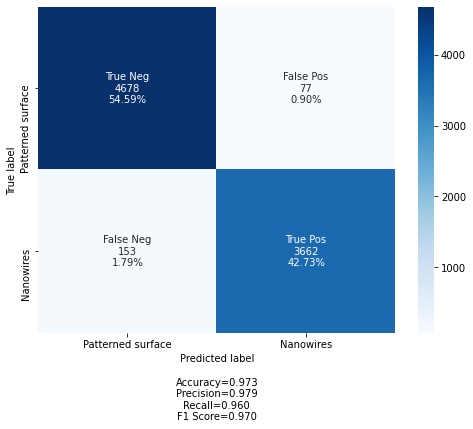

In [154]:

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Patterned surface', 'Nanowires']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues', figsize=(8,6))

In [168]:
!ls mynewfiles

# AI thinks this is ....

In [179]:
!rm -r mynewfilesTEST

!mkdir mynewfilesTEST
!mkdir mynewfilesTEST/folder1
!mkdir mynewfilesTEST/folder2

0
total training images: 4755
mynewfiles/folder1/L1_51c971f303345975a4b94ac9d85bfe7b.jpg
mynewfiles/folder1/L1_51c971f303345975a4b94ac9d85bfe7b.jpg
(768, 1024, 3)


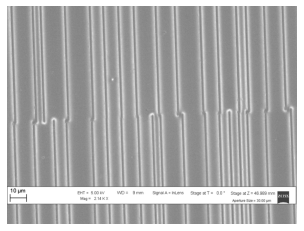

total training images: 3815
mynewfiles/folder1/L1_51c971f303345975a4b94ac9d85bfe7b.jpg
Found 1 images belonging to 2 classes.
Input files to AI are the following..
[[0.8908682  0.10913188]]
[0]
0
AI output : AI thinks this is a SEM image of a patterned surface


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [244]:
#@title Select a random file to predict. { run: "auto" }

import random 

pic_index = 673 #@param {type:"slider", min:2, max:800, step:1}


randomclass = random.randint(0, 1)


print(randomclass)
#randomclass = 0 #@param {type:"slider", min:0, max:1, step:1}


selectafile = "" 

for i in range(SET_NUMBER_OF_CLASSES):
  print('total training images:', len(os.listdir(ListofmyFolders[i])))

  if i==randomclass :
    rock_files = os.listdir(ListofmyFolders[i])


    next_rock = [os.path.join(ListofmyFolders[i], fname) 
                  for fname in rock_files[pic_index-1:pic_index]]

    for i, img_path in enumerate(next_rock):


        print(img_path)
        img = mpimg.imread(img_path)
        print(img_path)
        print(img.shape)
        plt.imshow(img)
        plt.axis('Off')
        plt.show()
        selectafile = img_path






print(selectafile)
import shutil, os
folder = 'mynewfilesTEST/folder1/'
for filename in os.listdir(folder):
    file_path = os.path.join(folder, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))

newPath = shutil.copy(selectafile, 'mynewfilesTEST/folder1/')

TESTINGNEWDIR = 'mynewfilesTEST'

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        TESTINGNEWDIR,
        target_size=(150, 150),
        color_mode="rgb",
        shuffle = False,
        class_mode='categorical',
        batch_size=1)

filenames = test_generator.filenames
nb_samples = len(filenames)

print('Input files to AI are the following..')


predict = model.predict_generator(test_generator,steps = nb_samples)

print(predict)
predicted_class_indices=np.argmax(predict,axis=1)
print(predicted_class_indices)

labels = (test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictionsanswers = [labels[k] for k in predicted_class_indices]

print(predicted_class_indices[0])

from IPython.core.display import display, HTML


if predicted_class_indices[0] == 0:
  print('AI output : AI thinks this is a SEM image of a patterned surface')
  display(HTML('<h1 >AI output : AI thinks this is a SEM image of a patterned surface</h1>'))
else:
    print('AI output : AI thinks this is a SEM image of a nanowire')
    display(HTML('<h1>AI output : AI thinks this is a SEM image of a nanowire</h1>'))

In [ ]:
print(predicted_class_indices[20])
print(labels(20))

In [ ]:
labels = (test_generator.class_indices)
print(labels)

In [ ]:
for i in range(SET_NUMBER_OF_CLASSES):
  print('total training images:', len(os.listdir(ListofmyFolders[i])))
  rock_files = os.listdir(ListofmyFolders[i])

  next_rock = [os.path.join(ListofmyFolders[i], fname) 
                for fname in rock_files[pic_index-2:pic_index]]
  for i, img_path in enumerate(next_rock):
    #print(img_path)
    img = mpimg.imread(img_path)
    print(img_path)
    print(img.shape)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

    

In [ ]:
for X_batch, y_batch in test_generator.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()

In [ ]:
x,y = test_generator.next()
for i in range(0,1):
    image = x[i]
    plt.imshow(image)
    plt.show()




In [ ]:
datagen = ImageDataGenerator(rotation_range=0)
# fit parameters from data
#datagen.fit(x)
countindex = 1
for X_batch, y_batch in datagen.flow(x, y, batch_size=1):
  # create a grid of 3x3 images
  plt.subplot(330 + 1 + i)
  plt.imshow(X_batch[i].reshape(150, 150, 3))
	# show the plot
  plt.show()
  countindex = countindex + 1

  if countindex == 2 :
    break

In [ ]:
STOPHERE

In [ ]:
plt.imshow(generate_pattern('block3_conv1', 0))
plt.show()

In [ ]:
for i in range(64):
  plt.imshow(generate_pattern('block5_conv3', i))
  plt.show()

In [ ]:
plt.imshow(generate_pattern('block5_conv3', 4))
plt.show()

In [ ]:
model.save('GOODVisuvalizationx.h5')


In [ ]:
from google.colab import files
files.download('GOODVisuvalizationx.h5') 

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec



for j in range(16):
  
  plt.figure(figsize = (16,16))
  gs1 = gridspec.GridSpec(8, 8)
  gs1.update(wspace=0.005, hspace=0.005) # set the spacing between axes. 

  for i in range(16):
     # i = i + 1 # grid spec indexes from 0

      img = generate_pattern('test1', i + 16*j)

      ax1 = plt.subplot(gs1[i])
      plt.axis('off')
      ax1.set_aspect('equal')
      plt.imshow(img)

  plt.show()

In [112]:
grads = K.gradients(loss, model.input)[0]


RuntimeError: ignored

In [ ]:
# We add 1e-5 before dividing so as to avoid accidentally dividing by 0.
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

In [ ]:
iterate = K.function([model.input], [loss, grads])

# Let's test it:
import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [ ]:
# We start from a gray image with some noise
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.

# Run gradient ascent for 40 steps
step = 1.  # this is the magnitude of each gradient update
for i in range(40):
    # Compute the loss value and gradient value
    loss_value, grads_value = iterate([input_img_data])
    # Here we adjust the input image in the direction that maximizes the loss
    input_img_data += grads_value * step